# PII Detection on Collection - MSFT Presidio Example
The following is an example of how to use the PIIAnalysisService with the MSFT presidio analyzer on a large set of PII.

> Note: This notebook requires all dependencies to have been installed. For more information, review readme.


In [1]:
from pii_codex.models.common import AnalysisProviderType
from pii_codex.services.pii_analysis import PII_ANALYSIS_SERVICE
import pandas as pd

# Run the detection and assessments in one shot with the PIIAnalysisService
analysis_results = PII_ANALYSIS_SERVICE.analyze_collection(
    analysis_provider=AnalysisProviderType.PRESIDIO.name,
    texts=[
        "Here is my contact information: Phone number 555-555-5555 and my email is example123@email.com",
        "Perfect, mine number if you need me is 777-777=7777. Where is the residence and what is the earliest the crew can arrive?"
        "I'll be at my home at 123 Dark Data Lane, OH, 11111 after 7PM",
        "Cool, I'll be there!",
        "Excellent, thanks so much!"
        ],
    language_code="en",
    collection_type="population",
    collection_name="PII Collection 1"
)

results = analysis_results.to_dict()
results

{'collection_name': 'PII Collection 1',
 'analyses': [{'analysis': [{'pii_type_detected': 'EMAIL_ADDRESS',
     'risk_level': 3,
     'risk_level_definition': 'Identifiable',
     'cluster_membership_type': 'Personal Preferences',
     'hipaa_category': 'Protected Health Information',
     'dhs_category': 'Stand Alone PII',
     'nist_category': 'Directly PII',
     'entity_type': 'EMAIL_ADDRESS',
     'score': 1.0,
     'start': 74,
     'end': 94},
    {'pii_type_detected': 'PHONE_NUMBER',
     'risk_level': 3,
     'risk_level_definition': 'Identifiable',
     'cluster_membership_type': 'Contact Information',
     'hipaa_category': 'Protected Health Information',
     'dhs_category': 'Stand Alone PII',
     'nist_category': 'Directly PII',
     'entity_type': 'PHONE_NUMBER',
     'score': 0.75,
     'start': 45,
     'end': 57},
    {'pii_type_detected': 'URL',
     'risk_level': 2,
     'risk_level_definition': 'Semi-Identifiable',
     'cluster_membership_type': 'Community Interac

In [2]:
# Peering into each and every analysis in collection
data = results.copy()
del data['analyses']

analyses_collection_df = pd.DataFrame(
    [data]
)

analyses_collection_df

,collection_name,detection_count,risk_scores,risk_score_mean,risk_score_standard_deviation,risk_score_variance,risk_score_mode,risk_score_median,detected_pii_types,detected_pii_type_frequencies
0,PII Collection 1,4,"[2.6666666666666665, 2, 1.0, 1.0]",1.666667,0.707107,0.5,1.0,1.5,"[LOCATION, EMAIL_ADDRESS, URL, PHONE_NUMBER]","{'EMAIL_ADDRESS': 1, 'PHONE_NUMBER': 1, 'URL':..."


In [3]:
analyses_collection_df[
    ['detection_count',
     'risk_scores',
     'risk_score_mean',
     'risk_score_variance',
     'risk_score_standard_deviation',
     'risk_score_mode',
     'risk_score_median']
]
analyses_collection_df.T

,0
collection_name,PII Collection 1
detection_count,4
risk_scores,"[2.6666666666666665, 2, 1.0, 1.0]"
risk_score_mean,1.666667
risk_score_standard_deviation,0.707107
risk_score_variance,0.5
risk_score_mode,1.0
risk_score_median,1.5
detected_pii_types,"[LOCATION, EMAIL_ADDRESS, URL, PHONE_NUMBER]"
detected_pii_type_frequencies,"{'EMAIL_ADDRESS': 1, 'PHONE_NUMBER': 1, 'URL':..."


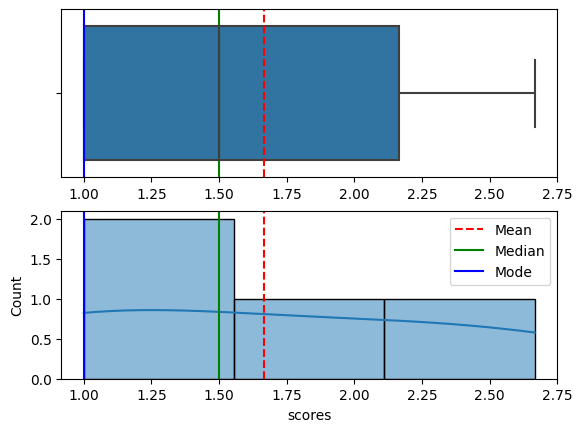

In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

sns.color_palette("rocket", as_cmap=True)

df = pd.DataFrame({"scores":analyses_collection_df.risk_scores.item()})

f, (ax_box, ax_hist) = plt.subplots(2)
mean=analyses_collection_df['risk_score_mean'].mean()
median=analyses_collection_df['risk_score_median'].median()
mode=analyses_collection_df['risk_score_mode'].mode().values[0]

sns.boxplot(data=df, x="scores", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="scores", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()